In [170]:
#import modules:
import pandas as pd
import wbgapi as wb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [103]:
#use search function for find indicators frome world bank data:
wb.search("Forest")

ID,Name,Field,Value
AG.LND.FRST.K2,Forest area (sq. km),Developmentrelevance,"...the international community is increasingly focusing on conserving diversity. Deforestation is a major cause of loss of biodiversity, and habitat conservation is..."
AG.LND.FRST.K2,Forest area (sq. km),IndicatorName,Forest area (sq. km)
AG.LND.FRST.K2,Forest area (sq. km),Limitationsandexceptions,...and Agricultural Organization (FAO) has been collecting and analyzing data on forest area since 1946. This is done at intervals of 5-10 years as part of the Global...
AG.LND.FRST.K2,Forest area (sq. km),Longdefinition,...Forest area is land under natural or planted stands of trees of at least 5 meters in...
AG.LND.FRST.K2,Forest area (sq. km),Statisticalconceptandmethodology,...Forest is determined both by the presence of trees and the absence of other...
AG.LND.FRST.ZS,Forest area (% of land area),Developmentrelevance,"...the international community is increasingly focusing on conserving diversity. Deforestation is a major cause of loss of biodiversity, and habitat conservation is..."
AG.LND.FRST.ZS,Forest area (% of land area),IndicatorName,Forest area (% of land area)
AG.LND.FRST.ZS,Forest area (% of land area),Limitationsandexceptions,...FAO has been collecting and analyzing data on forest area since 1946. This is done at intervals of 5-10 years as part of the Global...
AG.LND.FRST.ZS,Forest area (% of land area),Longdefinition,...Forest area is land under natural or planted stands of trees of at least 5 meters in...
AG.LND.FRST.ZS,Forest area (% of land area),Statisticalconceptandmethodology,...Forest is determined both by the presence of trees and the absence of other...


In [9]:
#list of country codes:
indicator_ids = ["AG.LND.ARBL.HA", "AG.LND.FRST.K2"]
#indicators = ['EG.USE.ELEC.KH.PC', 'EG.ELC.ACCS.ZS', 'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT']

In [228]:
#list of country codes:
country_codes = ['GBR', 'IND', 'AUS', 'CAN', 'CHE', 'USA']

In [374]:
#read data from world bank data into dataframe:
deforestation_df = wb.data.DataFrame(indicator_ids, country_codes, time=range(1980,2025,10))

#replace multiindex values:
deforestation_df.index = pd.MultiIndex.from_tuples([(x[0], x[1].replace('AG.LND.ARBL.HA', 'Arable land')) for x in deforestation_df.index])
deforestation_df.index = pd.MultiIndex.from_tuples([(x[0], x[1].replace('AG.LND.FRST.K2', 'Forest area')) for x in deforestation_df.index])

#change data frame columns values:
deforestation_df.columns = ["1980", "1990", "2000", "2010", "2020"]
deforestation_df.index.names = ['country', 'series']#change index names

In [375]:
#define function for
def data(filename):
    '''function which takes filename as arguement and 
       return two data frame: one with year as columns
       and one with country as column.
    '''
    country = filename.stack().unstack('country')
    year = filename
    return country, year

country_df, year_df = data(deforestation_df)

In [378]:
#dataframe which shows country as columns:
country_df.index.names=(['series', 'year'])#set an index name
country_df.columns.names = [None]
country_df

AUS         CAN       CHE        GBR          IND  \
series      year                                                             
Arable land 1980  17786000.0  40296000.0  381100.0  6918000.0  162854000.0   
            1990  16956000.0  41367000.0  403700.0  6620000.0  163459000.0   
            2000  23473000.0  40971000.0  408800.0  5876000.0  160930000.0   
            2010  25450200.0  37687000.0  404500.0  5970000.0  157009000.0   
Forest area 1990   1338822.0   3482729.3   11535.0    27780.0     639380.0   
            2000   1318141.0   3478019.7   11961.8    29540.0     675910.0   
            2010   1295461.0   3473222.1   12347.2    30590.0     694960.0   
            2020   1340051.0   3469281.0   12691.1    31900.0     721600.0   

                          USA  
series      year               
Arable land 1980  188755000.0  
            1990  185676000.0  
            2000  175368000.0  
            2010  157716500.0  
Forest area 1990    3024500.0  
            2000    3035360.0  
            2010    3087200.0  
            2020    3097950.0

In [380]:
#dataframe which shows year as columns:
year_df

1980         1990         2000         2010  \
country series                                                            
AUS     Arable land   17786000.0   16956000.0   23473000.0   25450200.0   
        Forest area          NaN    1338822.0    1318141.0    1295461.0   
CAN     Arable land   40296000.0   41367000.0   40971000.0   37687000.0   
        Forest area          NaN    3482729.3    3478019.7    3473222.1   
CHE     Arable land     381100.0     403700.0     408800.0     404500.0   
        Forest area          NaN      11535.0      11961.8      12347.2   
GBR     Arable land    6918000.0    6620000.0    5876000.0    5970000.0   
        Forest area          NaN      27780.0      29540.0      30590.0   
IND     Arable land  162854000.0  163459000.0  160930000.0  157009000.0   
        Forest area          NaN     639380.0     675910.0     694960.0   
USA     Arable land  188755000.0  185676000.0  175368000.0  157716500.0   
        Forest area          NaN    3024500.0    3035360.0    3087200.0   

                          2020  
country series                  
AUS     Arable land        NaN  
        Forest area  1340051.0  
CAN     Arable land        NaN  
        Forest area  3469281.0  
CHE     Arable land        NaN  
        Forest area    12691.1  
GBR     Arable land        NaN  
        Forest area    31900.0  
IND     Arable land        NaN  
        Forest area   721600.0  
USA     Arable land        NaN  
        Forest area  3097950.0

In [332]:
#stack index and unstack again at "series":
series_df = country_df.stack().unstack("series")
series_df

series        Arable land  Forest area
     country                          
1980 AUS       17786000.0          NaN
     CAN       40296000.0          NaN
     CHE         381100.0          NaN
     GBR        6918000.0          NaN
     IND      162854000.0          NaN
     USA      188755000.0          NaN
1990 AUS       16956000.0    1338822.0
     CAN       41367000.0    3482729.3
     CHE         403700.0      11535.0
     GBR        6620000.0      27780.0
     IND      163459000.0     639380.0
     USA      185676000.0    3024500.0
2000 AUS       23473000.0    1318141.0
     CAN       40971000.0    3478019.7
     CHE         408800.0      11961.8
     GBR        5876000.0      29540.0
     IND      160930000.0     675910.0
     USA      175368000.0    3035360.0
2010 AUS       25450200.0    1295461.0
     CAN       37687000.0    3473222.1
     CHE         404500.0      12347.2
     GBR        5970000.0      30590.0
     IND      157009000.0     694960.0
     USA      157716500.0    3087200.0
2020 AUS              NaN    1340051.0
     CAN              NaN    3469281.0
     CHE              NaN      12691.1
     GBR              NaN      31900.0
     IND              NaN     721600.0
     USA              NaN    3097950.0

In [383]:
df_country = country_df.reset_index()#reset index
df_country

,series,year,AUS,CAN,CHE,GBR,IND,USA
0,Arable land,1980,17786000.0,40296000.0,381100.0,6918000.0,162854000.0,188755000.0
1,Arable land,1990,16956000.0,41367000.0,403700.0,6620000.0,163459000.0,185676000.0
2,Arable land,2000,23473000.0,40971000.0,408800.0,5876000.0,160930000.0,175368000.0
3,Arable land,2010,25450200.0,37687000.0,404500.0,5970000.0,157009000.0,157716500.0
4,Forest area,1990,1338822.0,3482729.3,11535.0,27780.0,639380.0,3024500.0
5,Forest area,2000,1318141.0,3478019.7,11961.8,29540.0,675910.0,3035360.0
6,Forest area,2010,1295461.0,3473222.1,12347.2,30590.0,694960.0,3087200.0
7,Forest area,2020,1340051.0,3469281.0,12691.1,31900.0,721600.0,3097950.0


In [342]:
#create new dataframe:
ind_df = df_country[["series","year", "IND"]]
ind_df

,series,year,IND
0,Arable land,1980,162854000.0
1,Arable land,1990,163459000.0
2,Arable land,2000,160930000.0
3,Arable land,2010,157009000.0
4,Forest area,1990,639380.0
5,Forest area,2000,675910.0
6,Forest area,2010,694960.0
7,Forest area,2020,721600.0


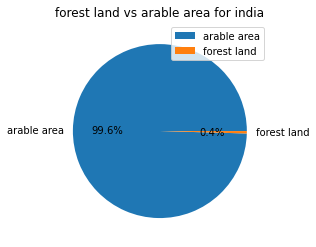

In [416]:
#pie chart shows india
plt.pie(df_country.query('year=="2010"').groupby(["series"])["IND"].mean(), labels= ["arable area", "forest land"], autopct='%1.1f%%')
plt.legend()
plt.title("forest land vs arable area for india")
plt.savefig("ind forest vs arable area")
plt.show()

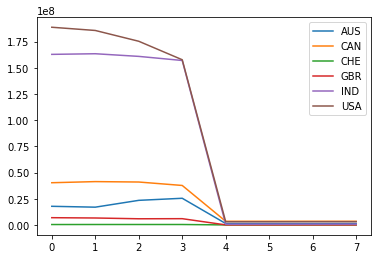

In [417]:
df_country.plot();

In [424]:
arable_land_c = df_country[df_country["series"] == "Arable land"]

In [425]:
forest_area_c = df_country[df_country["series"] == "Forest area"]

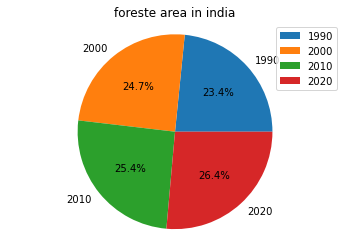

In [386]:
#pie chrt shows india's forest area:
plt.pie(forest_area_c["IND"], labels=["1990", "2000", "2010", "2020"], autopct='%1.1f%%')
plt.axis('equal')
plt.legend()
plt.title("foreste area in india")
plt.savefig("forest_area_ind")
plt.show()


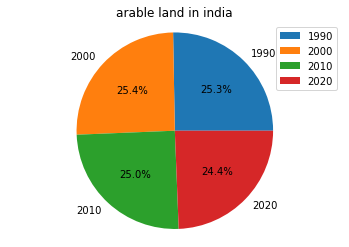

In [426]:
plt.pie(arable_land_c["IND"], labels=["1990", "2000", "2010", "2020"], autopct='%1.1f%%')
plt.axis('equal')
plt.legend()
plt.title("arable land in india")
plt.savefig("arable_land_ind")
plt.show()

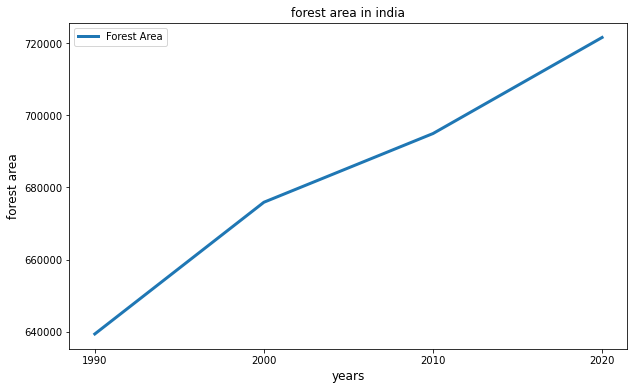

In [438]:
'''plt.figure()
plt.plot()'''
plt.figure(figsize=(10,6))
plt.plot(forest_area_c["year"], forest_area_c["IND"], linewidth=3,label="Forest Area")
plt.legend()
plt.title("forest area in india")
plt.xlabel("years", fontsize=12)
plt.ylabel("forest area", fontsize=12)
plt.savefig("forest area ind")
plt.show()

In [428]:
#find corealtion between countrys:
df_country.corr()

,AUS,CAN,CHE,GBR,IND,USA
AUS,1.000000,0.956284,0.972236,0.940329,0.961982,0.939747
CAN,0.956284,1.000000,0.997612,0.995776,0.999332,0.998207
CHE,0.972236,0.997612,1.000000,0.991292,0.998617,0.992243
GBR,0.940329,0.995776,0.991292,1.000000,0.996602,0.998158
IND,0.961982,0.999332,0.998617,0.996602,1.000000,0.997070
USA,0.939747,0.998207,0.992243,0.998158,0.997070,1.000000


In [440]:
#find corealtion between year:
df_year.corr()

,1980,1990,2000,2010,2020
1980,1.000000,0.999878,0.998667,0.994308,NaN
1990,0.999878,1.000000,0.999209,0.996443,0.999621
2000,0.998667,0.999209,1.000000,0.998801,0.999832
2010,0.994308,0.996443,0.998801,1.000000,0.999924
2020,NaN,0.999621,0.999832,0.999924,1.000000


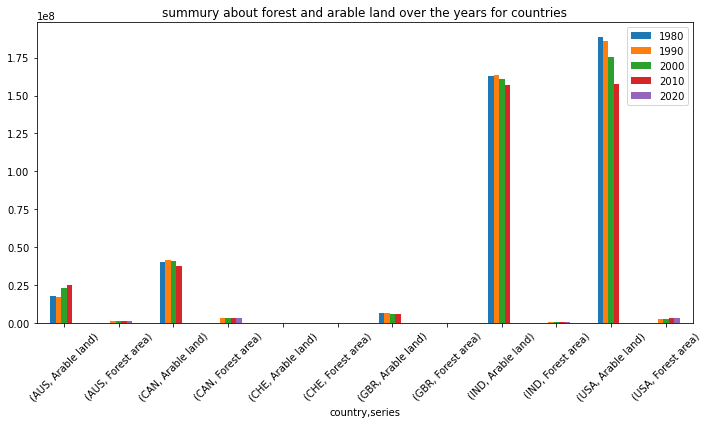

In [441]:
year_df.plot(kind="bar",figsize=(10,6))
plt.xticks(rotation=45)
plt.title("summury about forest and arable land over the years for countries")
plt.tight_layout()
plt.savefig("dataframe plot")
plt.show()

In [442]:
df_year = year_df.reset_index()
df_year

,country,series,1980,1990,2000,2010,2020
0,AUS,Arable land,17786000.0,16956000.0,23473000.0,25450200.0,NaN
1,AUS,Forest area,NaN,1338822.0,1318141.0,1295461.0,1340051.0
2,CAN,Arable land,40296000.0,41367000.0,40971000.0,37687000.0,NaN
3,CAN,Forest area,NaN,3482729.3,3478019.7,3473222.1,3469281.0
4,CHE,Arable land,381100.0,403700.0,408800.0,404500.0,NaN
5,CHE,Forest area,NaN,11535.0,11961.8,12347.2,12691.1
6,GBR,Arable land,6918000.0,6620000.0,5876000.0,5970000.0,NaN
7,GBR,Forest area,NaN,27780.0,29540.0,30590.0,31900.0
8,IND,Arable land,162854000.0,163459000.0,160930000.0,157009000.0,NaN
9,IND,Forest area,NaN,639380.0,675910.0,694960.0,721600.0


In [443]:
Arable_land_y = df_year[df_year["series"]=="Arable land"]
Arable_land_y

,country,series,1980,1990,2000,2010,2020
0,AUS,Arable land,17786000.0,16956000.0,23473000.0,25450200.0,NaN
2,CAN,Arable land,40296000.0,41367000.0,40971000.0,37687000.0,NaN
4,CHE,Arable land,381100.0,403700.0,408800.0,404500.0,NaN
6,GBR,Arable land,6918000.0,6620000.0,5876000.0,5970000.0,NaN
8,IND,Arable land,162854000.0,163459000.0,160930000.0,157009000.0,NaN
10,USA,Arable land,188755000.0,185676000.0,175368000.0,157716500.0,NaN


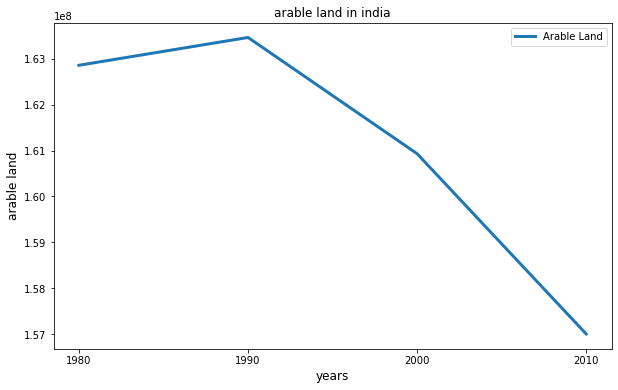

In [444]:

plt.figure(figsize=(10,6))
#plt.plot(forest_area_c["year"], forest_area_c["IND"], linewidth=3,label="Forest Area")
plt.plot(arable_land_c["year"], arable_land_c["IND"],linewidth=3,label="Arable Land")
plt.legend()
plt.title("arable land in india")
plt.xlabel("years", fontsize=12)
plt.ylabel("arable land", fontsize=12)
plt.savefig("arable land ind")
plt.show()

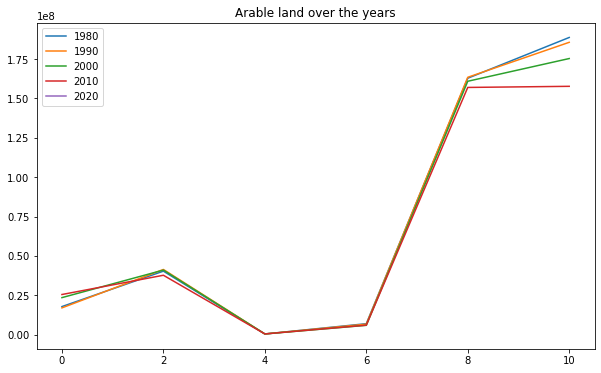

In [445]:
#arable land pyplot:
Arable_land_y.plot(figsize=(10,6))
plt.title("Arable land over the years")
plt.savefig("arable_land")
plt.show()

In [446]:
Forest_area_y = df_year[df_year["series"]=="Forest area"]
Forest_area_y

,country,series,1980,1990,2000,2010,2020
1,AUS,Forest area,NaN,1338822.0,1318141.0,1295461.0,1340051.0
3,CAN,Forest area,NaN,3482729.3,3478019.7,3473222.1,3469281.0
5,CHE,Forest area,NaN,11535.0,11961.8,12347.2,12691.1
7,GBR,Forest area,NaN,27780.0,29540.0,30590.0,31900.0
9,IND,Forest area,NaN,639380.0,675910.0,694960.0,721600.0
11,USA,Forest area,NaN,3024500.0,3035360.0,3087200.0,3097950.0


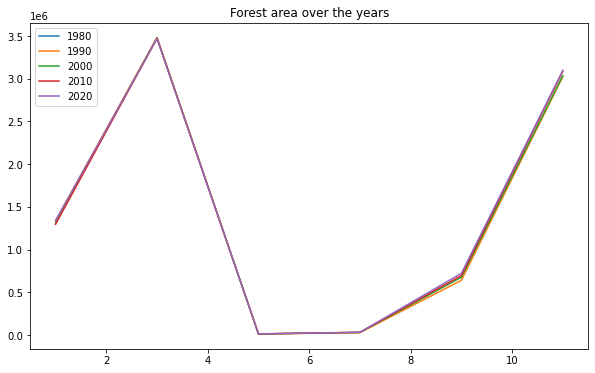

In [447]:
#forest area df plot:
Forest_area_y.plot(figsize=(10,6))
plt.title("Forest area over the years")
plt.savefig("forest_area")
plt.show()